### EXPLORATORY DATA ANALYSIS

Lets look and analyse our data set -

The data has been taken from Kaggle - 'https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data'

We will perform:

    -Data Quality and Missing Value Check

    -Univariate Analysis

    -Bivariative Analysis

    -Multivariate Analysis
    
    -Correlation Aanalysis
    

In [2]:
import warnings

warnings.filterwarnings('ignore')

#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')


Loading Data 

In [7]:
df = pd.read_csv(r'C:\Users\Manan\projects\Diabetes prediction\data\diabetes_prediction_dataset.csv')

In [8]:

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# EDA

# 1. Data Quality

1. Handling duplicate values

In [5]:
# Duplicate Values

print('Number opf Duplicate rows: ', len(df[df.duplicated()]))

Number opf Duplicate rows:  3854


In [6]:
# Removing dupliacte data

df = df.drop_duplicates()

2. Unique values

In [7]:
#Uniqune Values per Column

for col in df.columns:
    distinct_values = len(df[col].unique())
    print(f"{col}: {distinct_values} unique values" )



gender: 3 unique values
age: 102 unique values
hypertension: 2 unique values
heart_disease: 2 unique values
smoking_history: 6 unique values
bmi: 4247 unique values
HbA1c_level: 18 unique values
blood_glucose_level: 18 unique values
diabetes: 2 unique values


In [8]:
# Removing unnecessary values from Gender Column

df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [9]:
df = df[df['gender'] != 'Other']

In [10]:
df['gender'].value_counts()


gender
Female    56161
Male      39967
Name: count, dtype: int64

3. Missing Values

In [11]:
# checking for missing values 

df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Our data has no missing values

4. Discriptive Stats of Data

In [12]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000
mean,41.796617,0.077615,0.040810,27.321450,5.532633,138.218001,0.088237
std,22.463329,0.267567,0.197851,6.767811,1.073225,40.911190,0.283640
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


# 2. Univariate Analysis

Text(0, 0.5, 'Count')

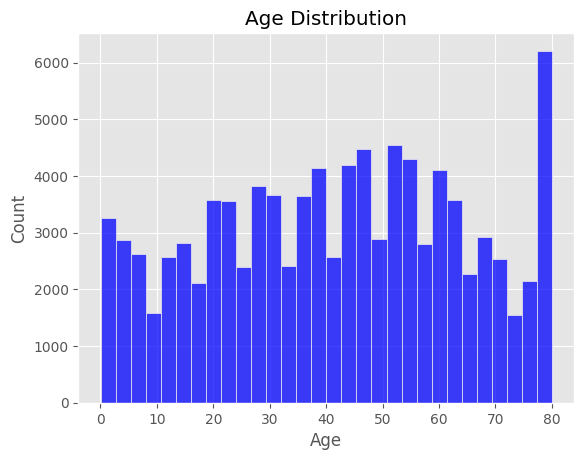

In [13]:
#Histogram of Age

sns.histplot(df['age'], bins= 30, color = 'blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')


([<matplotlib.patches.Wedge at 0x1fd7033ee10>,
 [Text(-0.28769776762038696, 1.061710880845744, 'Female'),
  Text(0.2876976073065008, -1.0617109242868863, 'Male')],
 [Text(-0.1569260550656656, 0.5791150259158604, '58.4%'),
  Text(0.15692596762172767, -0.5791150496110289, '41.6%')])

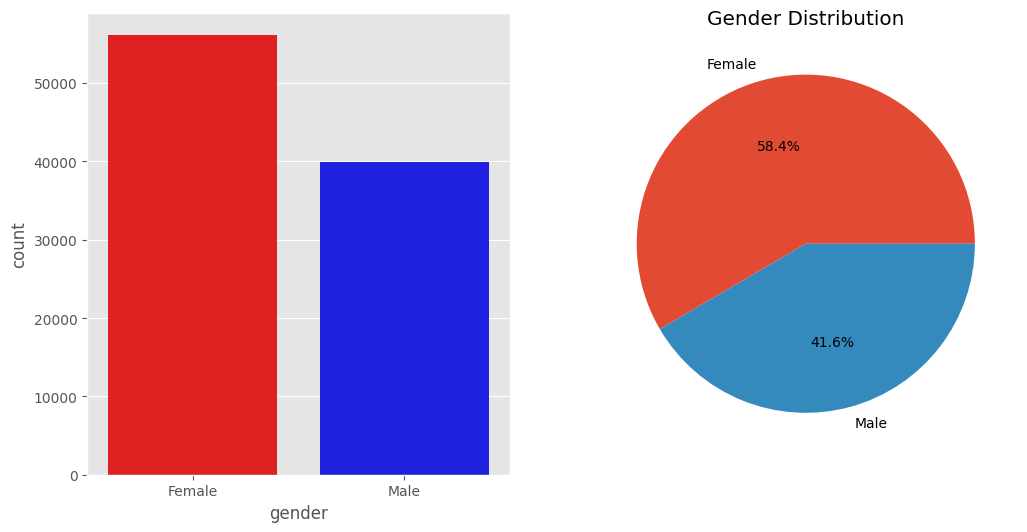

In [14]:
#Barplot and PieChart for gender

gender_count = df['gender'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x='gender', data=df, ax =ax1, palette=['red', 'blue'])
plt.title('Gender Distribution')
plt.pie(gender_count, labels=['Female', 'Male'], autopct='%1.1f%%')


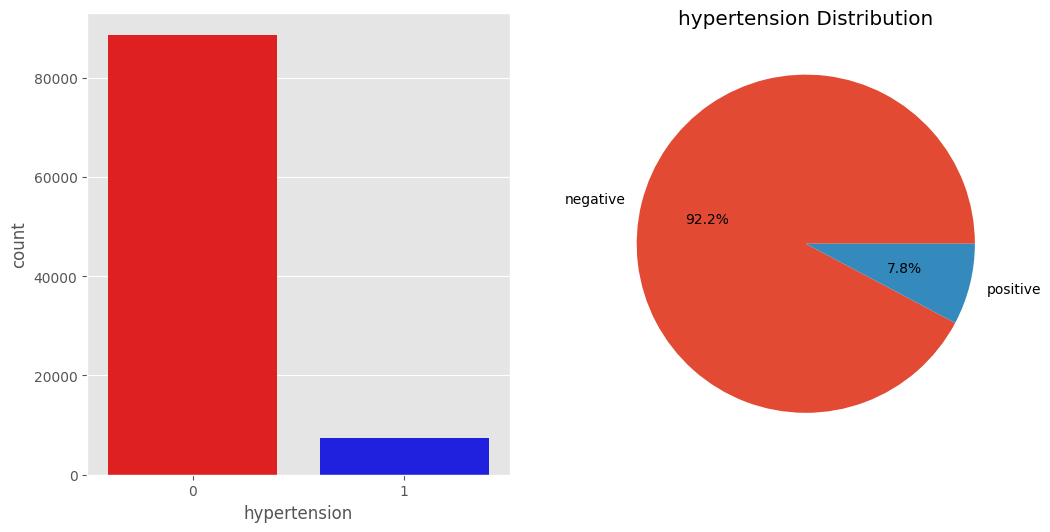

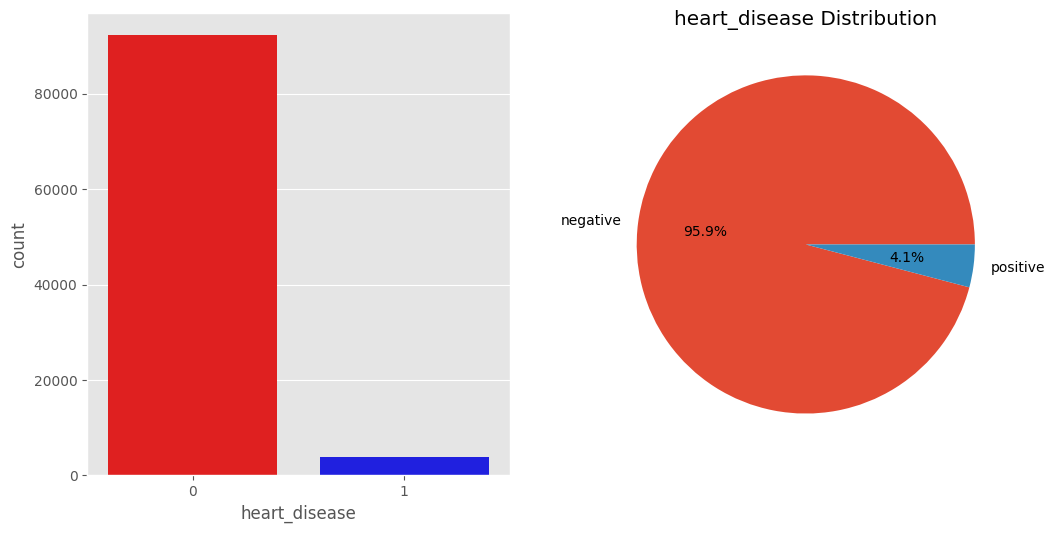

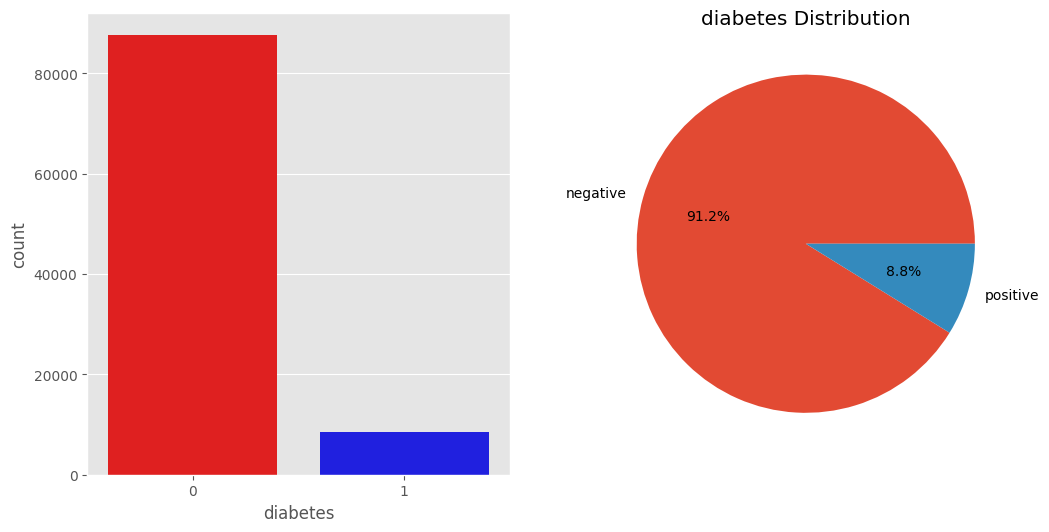

In [21]:
#barplot/countplot for hypertension, heart disease and diabates

for col in ['hypertension',  'heart_disease', 'diabetes']:

    count= df[col].value_counts()
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    
    sns.countplot(data = df, x = col, palette=['red','blue'], ax=ax1)
    plt.title(f'{col} Distribution')
    plt.pie(count, labels=['negative','positive'], autopct='%1.1f%%')
    plt.show()


Text(0.5, 1.0, 'Smoking History Distribution')

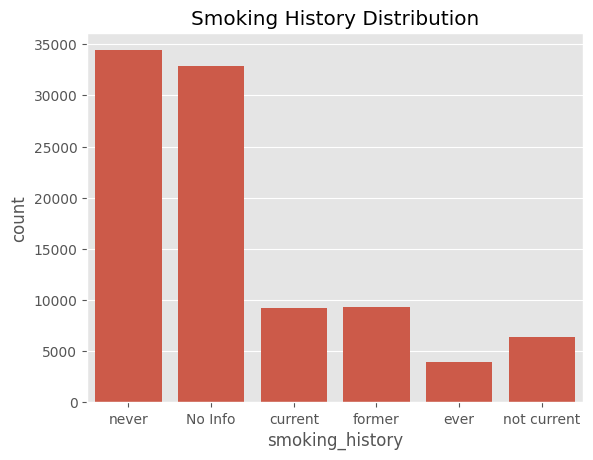

In [26]:
#smoking history barplot

sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')


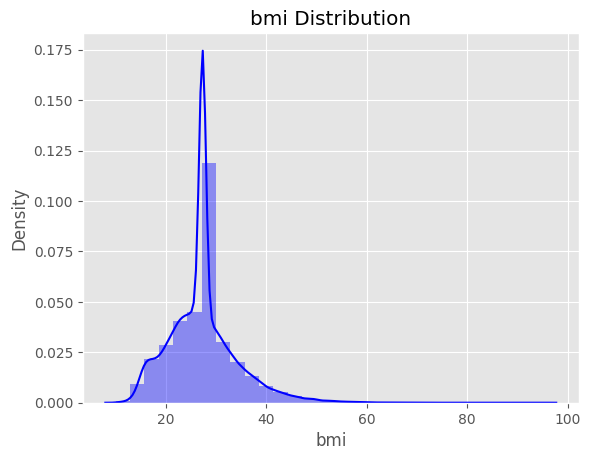

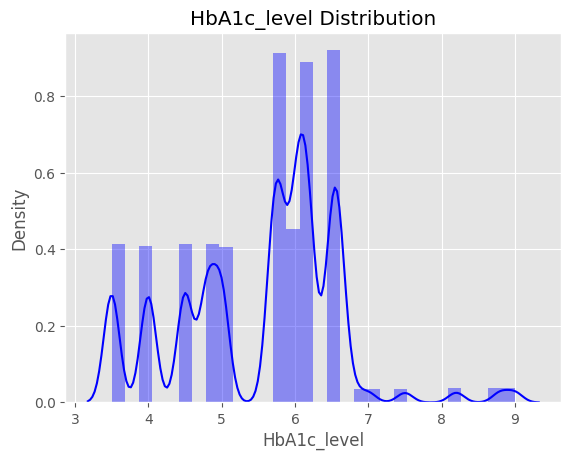

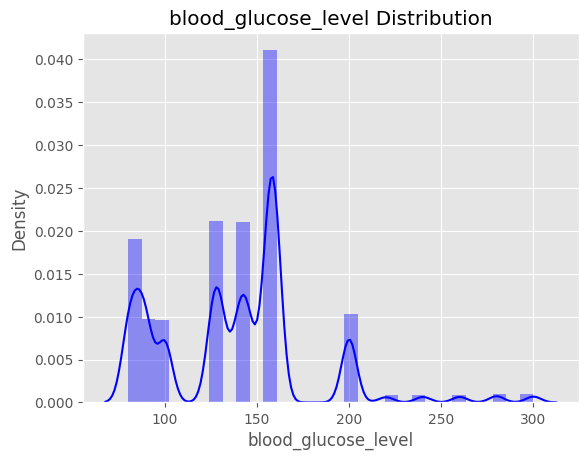

In [30]:
#distribution plot for bmi, HbA1c levle and Blood glucose level

for col in ['bmi', 'HbA1c_level', 'blood_glucose_level']:

    sns.distplot(df[col], bins = 30, color='blue')
    plt.title(f'{col} Distribution')
    plt.show()

# 3. Bivariate Analysis

<Axes: xlabel='gender', ylabel='count'>

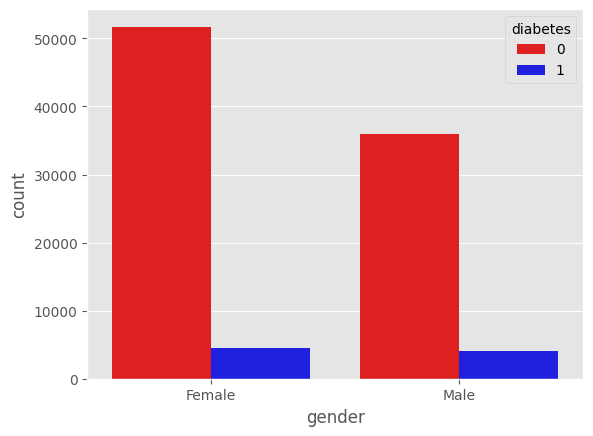

In [39]:
#barplot of gender with respect to diabetes

sns.countplot(data=df, x = 'gender', hue='diabetes', palette=['red', 'blue'])

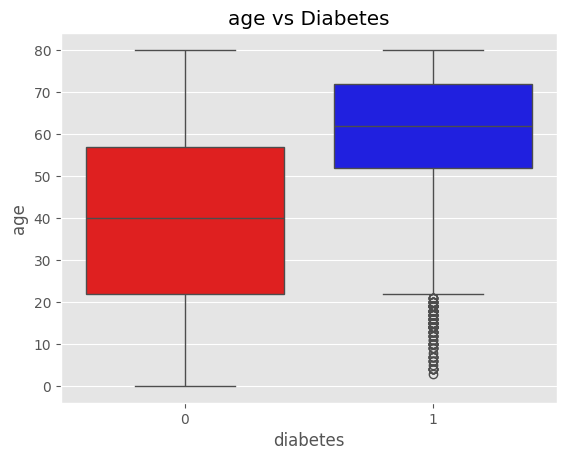

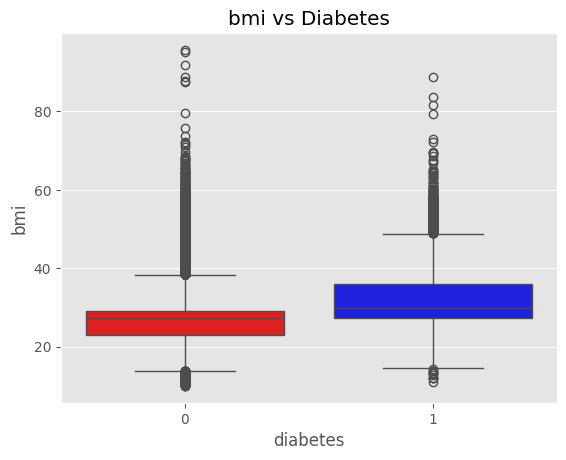

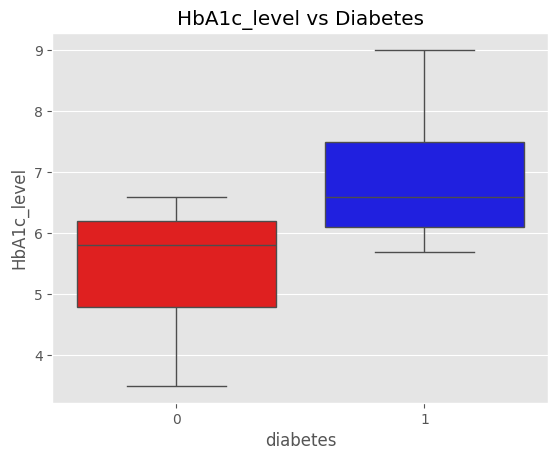

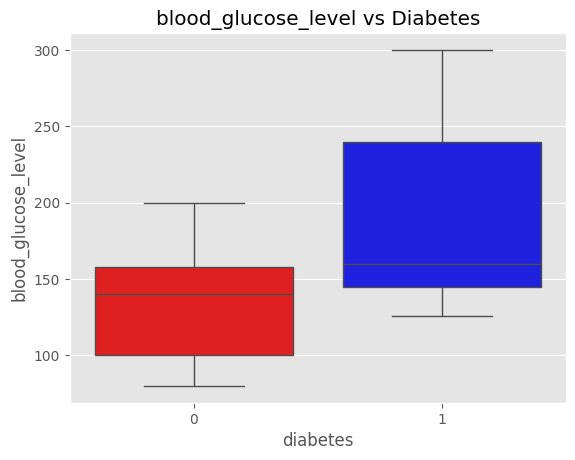

In [40]:
#boxplot of (bmi, age, HbA1c level, blood glucose level) vs diabetes

for col in ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']:

    print('\n \n \n')

    sns.boxplot(data = df, x = 'diabetes', y = col, palette=['red', 'blue'])
    plt.title(f'{col} vs Diabetes')
    plt.show()

# 4. Multivariate Analysis

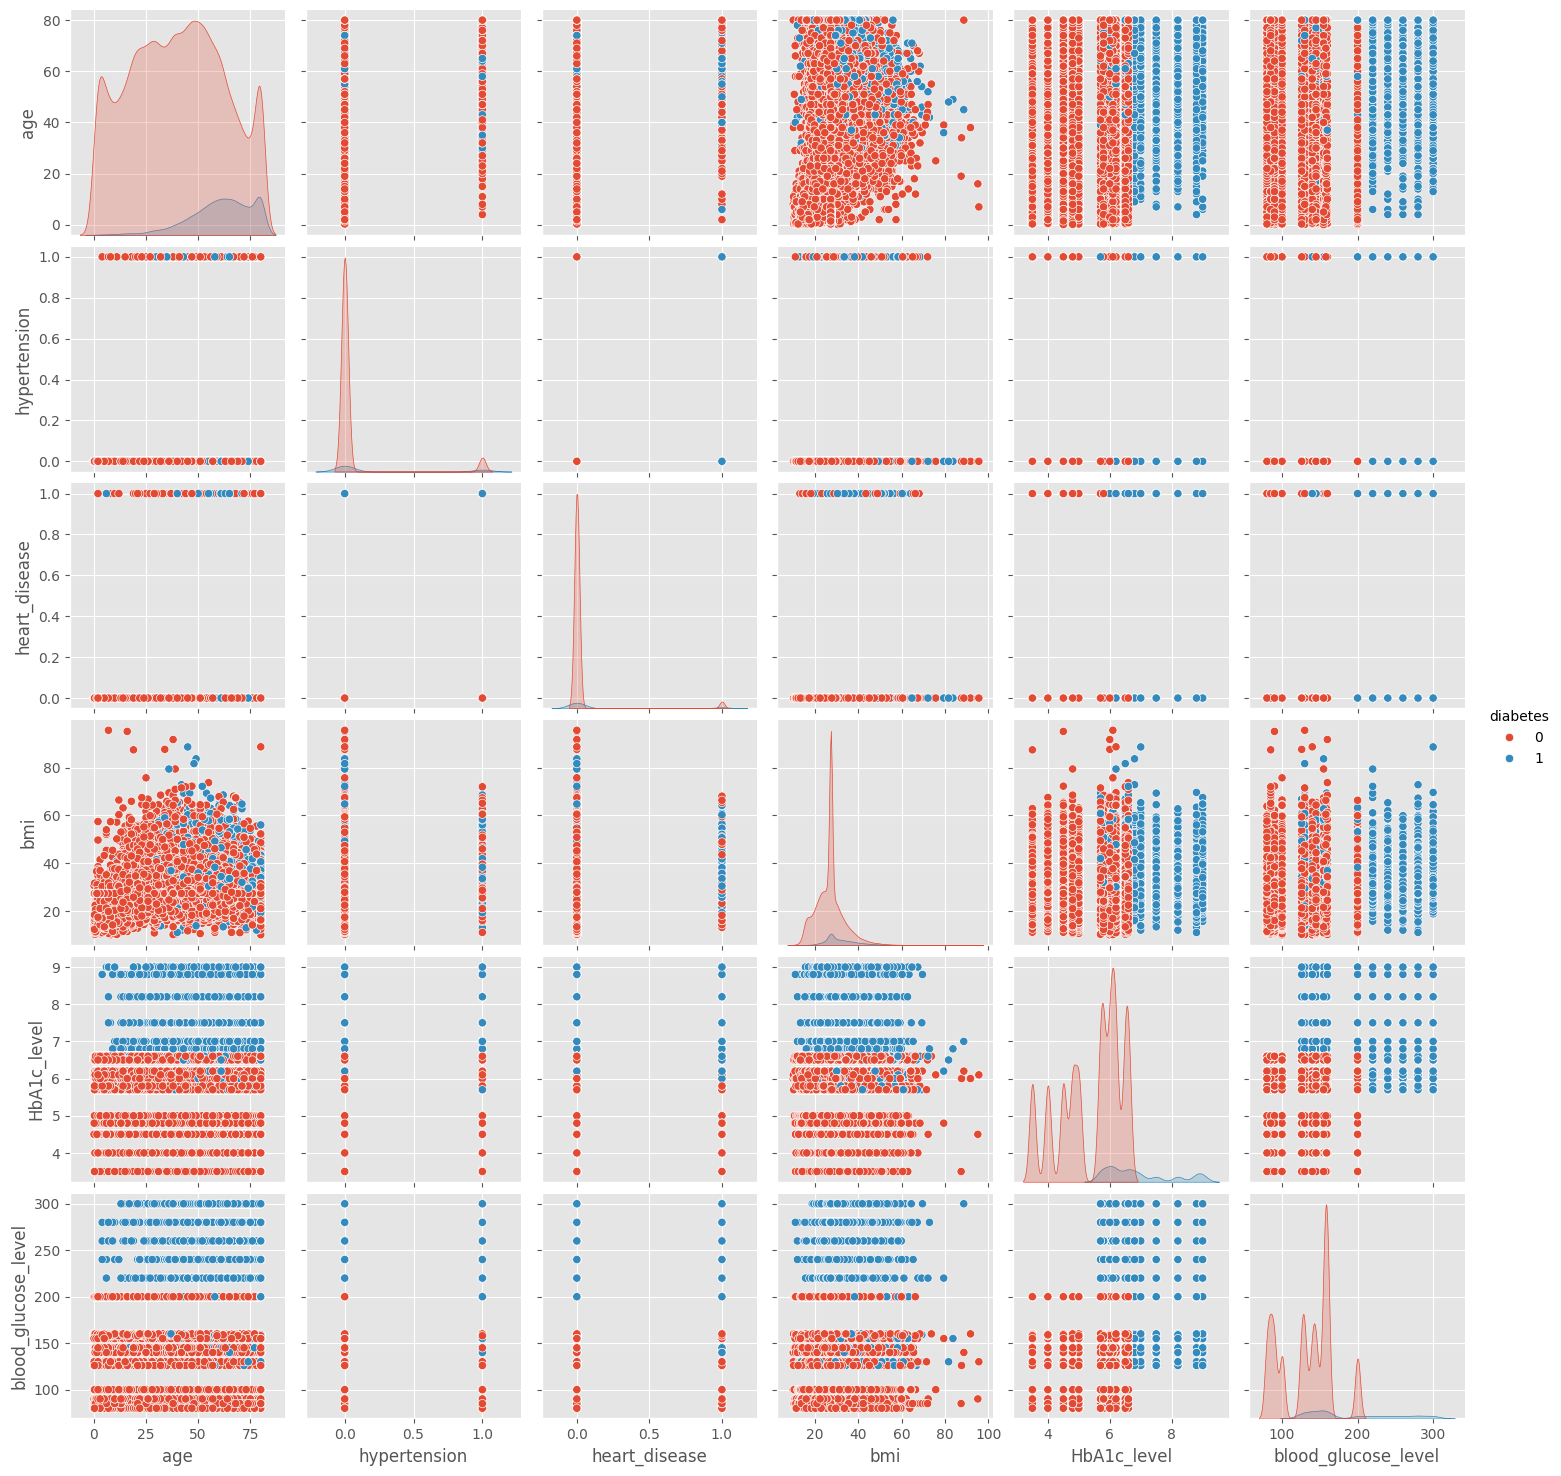

In [42]:
#Pairplot for the numeric columns of dataset

sns.pairplot(df, hue = 'diabetes')

Text(0.5, 1.0, 'BMI VS AGE')

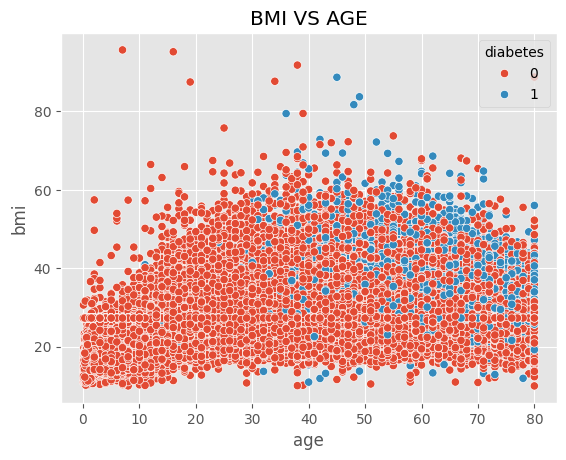

In [44]:
#scatter plo for bmi vs age with respect to diabetes

sns.scatterplot(data=df, x = 'age', y = 'bmi', hue = 'diabetes')
plt.title('BMI VS AGE')

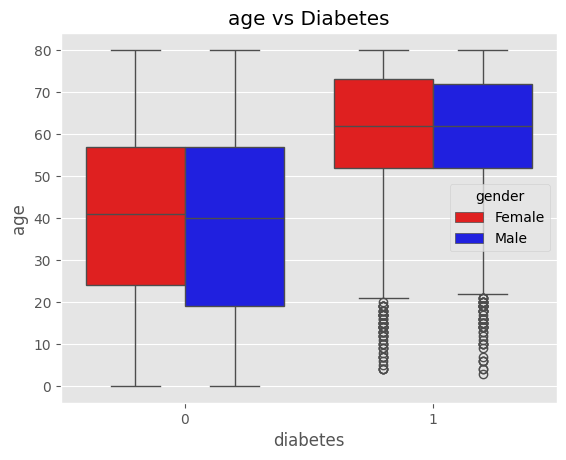

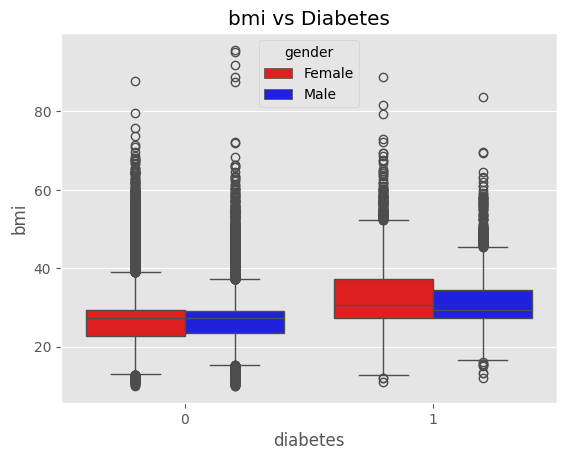

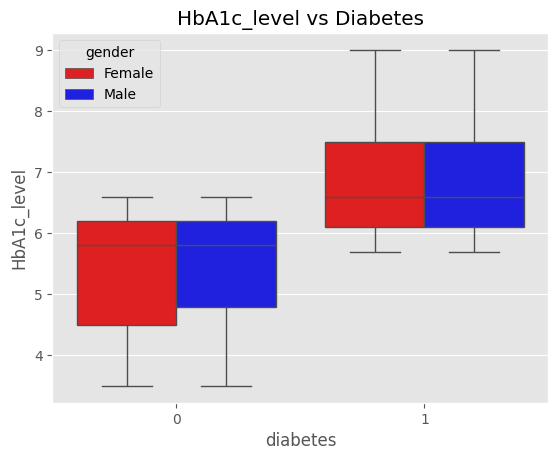

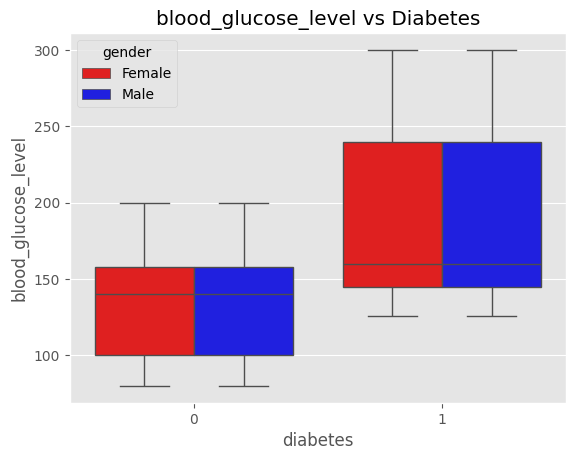

In [45]:
#boxplot of (bmi, age, HbA1c level, blood glucose level) vs diabetes seperated by both gender

for col in ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']:

    print('\n \n \n')

    sns.boxplot(data = df, x = 'diabetes', y = col, hue = 'gender', palette=['red', 'blue'])
    plt.title(f'{col} vs Diabetes')
    plt.show()

# 5. Correlation

Let's first clean the smoking history column and then we will save the clean data as 'Data_clean.csv'

After that we will perform one hot encoding for following columns- 

    -Gender
    -Smoking History

In [47]:
# Cleaning the smoking_history 
df['smoking_history'].value_counts()

smoking_history
never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: count, dtype: int64

We can convert these 6 unique values into 3 values named- 

    -Non_Smoker
    -Past_Smoker
    -Current_Smoker

In [48]:
#replacing values in smokign _history column

df['smoking_history'] = df['smoking_history'].replace({'never':'non_smoker',
                                                       'No Info': 'non_smoker',
                                                       'former': 'past_smoker',
                                                       'current': 'current_smoker',
                                                       'not current': 'past_smoker',
                                                       'ever' : 'past_smoker'})

In [49]:
df['smoking_history'].value_counts()

smoking_history
non_smoker        67276
past_smoker       19655
current_smoker     9197
Name: count, dtype: int64

In [51]:
#Saving data into a csv file

df.to_csv('data_clean.csv', index=False)


Now we will perform the one hot encoding for the following columns-

    -Gender
    -Smoking History

In [61]:
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'], prefix='', prefix_sep='')

In [65]:
#Converting True False values to 1, 0

for col in ['Female', 'Male', 'current_smoker','non_smoker', 'past_smoker']:
    df_encoded[col] = df_encoded[col].astype(int)

In [68]:
df_encoded.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,current_smoker,non_smoker,past_smoker
0,80.0,0,1,25.19,6.6,140,0,1,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,1,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,1,0,0


We will save this ecoded dataset as 'data_encoded' so that we can use it in future for machine learning models

In [69]:
df_encoded.to_csv('data_encoded.csv', index = False)

Now that all the columns are converted into numerical format after one hot encoding, we can perform and check correlation between every feature.


<Axes: >

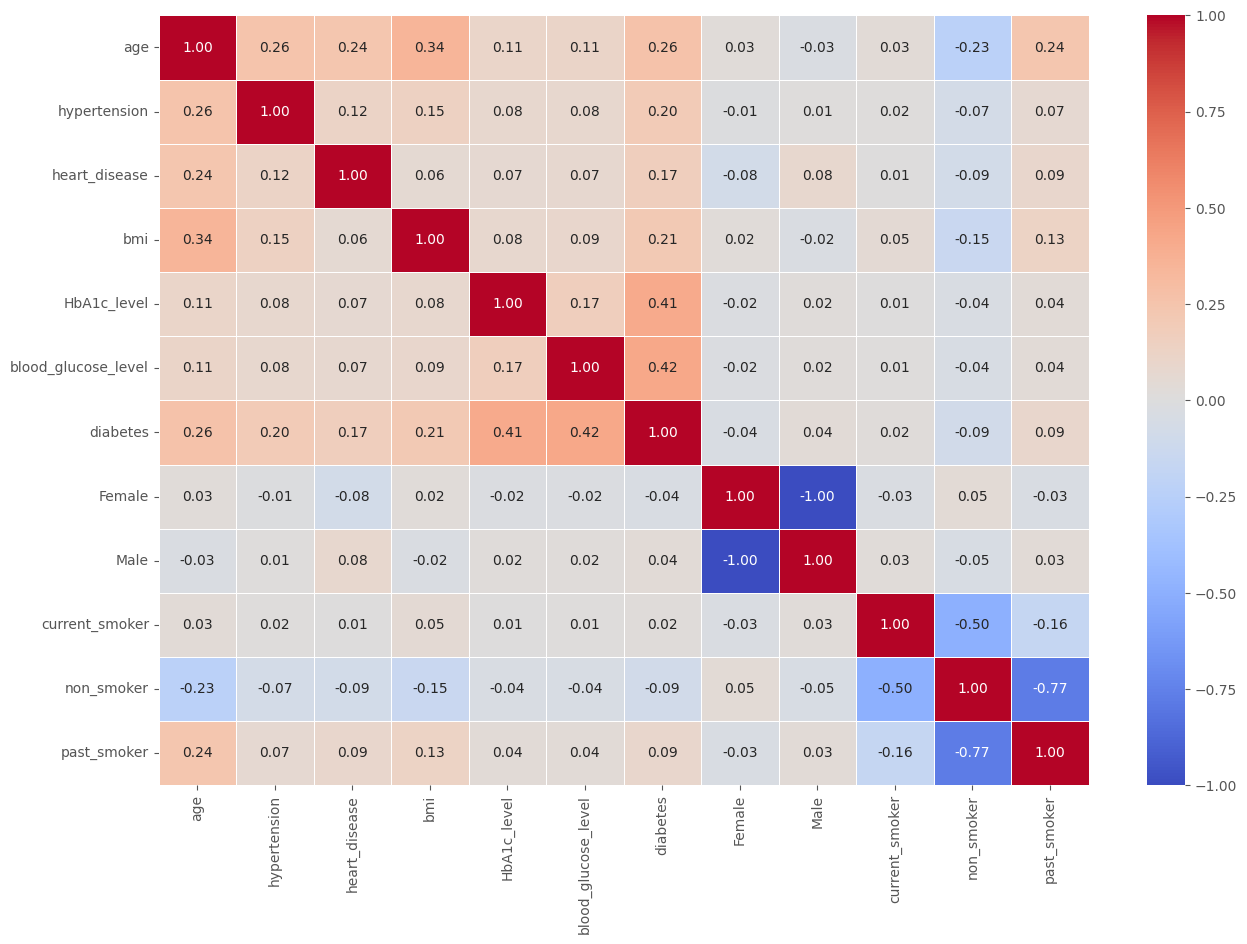

In [78]:
corr = df_encoded.corr()

#plotting the correlations as a heatmap

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

<Axes: >

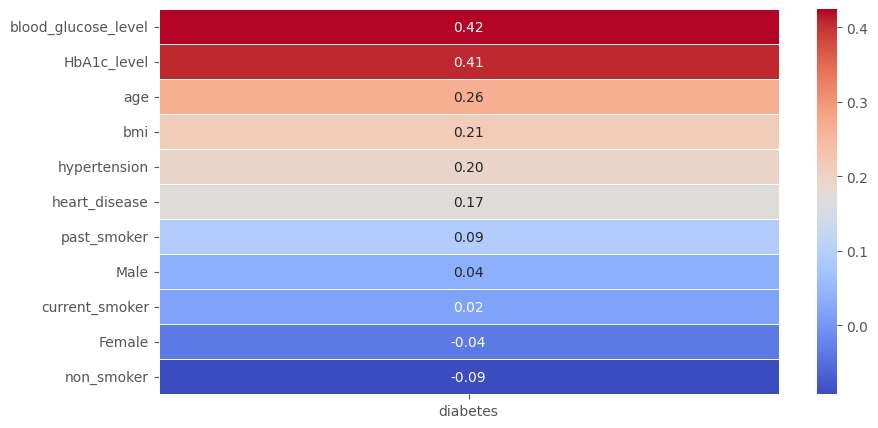

In [87]:
#correlation of each feature with target feature diabetes

corr_diabetes = corr['diabetes'].drop('diabetes')

plt.figure(figsize=(10, 5))

sns.heatmap(corr_diabetes.sort_values(ascending=False).to_frame(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

Blood Glucose Level and HbA1C_level has the highest correlation with diabetes